In [1]:
import os 
os.getcwd()

'/Users/yiyi/Lab_project/O18/PythonVersion'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
from sklearn import linear_model

In [44]:
# read remote-sensing data
rsdata = pd.read_csv("data/rsdata.csv")
# drop row with na
rsdata = rsdata.dropna()
rsdata.reset_index()
# compute mean of remote-sensing data
rsdata_mean = rsdata.iloc[:,3:].mean(axis=1)
# compute standard deviation of remote-sensing data
rsdata_std = rsdata.iloc[:,3:].std(axis=1)
# compute standardized anomalies of remote-sensing data
rsdata_anomalies = rsdata.iloc[:,3:].sub(rsdata_mean.to_numpy(),axis=0).div(rsdata_std.to_numpy(),axis=0)
rsdata_anomalies.head()

,1997 Jun,1997 Jul,1997 Aug,1998 Jun,1998 Jul,1998 Aug,1999 Jun,1999 Jul,1999 Aug,2000 Jun,...,2008 Aug,2009 Jun,2009 Jul,2009 Aug,2010 Jun,2010 Jul,2010 Aug,2011 Jun,2011 Jul,2011 Aug
0,2.431622,-0.705633,0.187945,0.714751,-0.373080,-0.914502,1.225702,0.209446,-0.748938,0.355719,...,-1.026509,1.796008,0.266361,-0.208960,1.391840,-0.584055,-1.495383,1.260118,-0.374984,-0.872576
1,2.347564,-0.642229,0.222636,0.787049,-0.204999,-0.806426,1.312915,0.035489,-0.910280,0.601021,...,-1.107028,2.007968,0.328763,-0.271331,1.296851,-1.018299,-1.370837,1.050866,-0.231185,-0.673814
2,2.253982,-0.886681,0.083607,0.897991,-0.127914,-0.822240,1.488523,0.069918,-0.728803,0.350642,...,-1.063739,2.001800,0.201025,-0.219030,1.114370,-0.754093,-1.424488,1.092504,-0.212146,-0.693717
3,2.002694,-0.762856,-0.167656,1.734649,-0.195799,-0.622647,1.048929,-0.263824,-1.034476,0.458346,...,-0.863365,1.971415,0.163404,-0.127903,1.506849,-0.358839,-1.438363,0.813725,-0.200359,-1.424975
4,2.561759,-0.496867,0.123725,1.695551,-0.059179,-0.710151,0.856173,0.270633,-0.855483,0.803280,...,-1.258916,1.783467,0.180300,-0.360283,1.510270,-0.339034,-1.426746,1.423666,-0.404998,-0.818688


In [6]:
# apply svd to standardized anomalies of remote-sensing data
U, d, Vt = svd(rsdata_anomalies)
U = pd.DataFrame(U)
d = pd.DataFrame(d)
Vt = pd.DataFrame(Vt)
# export U to EOFs.csv, d to Eigenvalues.csv and Vt to PCs.csv
# U.to_csv("data/EOFs.csv", index=False)
# d.to_csv("data/Eigenvalues.csv", index=False)
# Vt.to_csv("data/PCs.csv", index=False)

In [45]:
# load EOF modes data
EOFs = pd.read_csv("data/EOFs.csv")
EOFs.head()

,0,1,2,3,4,5,6,7,8,9,...,846,847,848,849,850,851,852,853,854,855
0,-0.037465,0.024862,-0.044253,0.023248,-0.000612,0.031403,-0.015720,0.017634,-0.005800,-0.037970,...,-0.031306,-0.055673,-0.034934,-0.030235,-0.016203,0.008143,-0.014531,-0.019492,-0.013247,-0.018482
1,-0.037610,0.023681,-0.041403,0.029172,-0.004985,0.027922,-0.018715,0.017969,0.004162,-0.028106,...,0.047970,0.068106,0.082682,0.039379,0.055734,0.083271,0.076503,0.092807,0.079489,0.078807
2,-0.036690,0.025292,-0.042710,0.028108,-0.006396,0.021586,-0.037568,0.017260,-0.006754,-0.034158,...,0.062712,0.049632,0.085709,0.031218,0.061804,0.082771,0.044249,0.028322,0.020939,0.022192
3,-0.037742,0.012001,-0.038077,0.005248,-0.026541,0.029454,-0.040983,0.033164,-0.011697,-0.029893,...,0.082935,0.102863,0.051837,0.037621,0.062724,0.069778,0.082137,0.066024,0.046867,0.065127
4,-0.035926,0.020418,-0.046676,0.026820,-0.004919,0.047025,-0.034235,0.045874,-0.012150,-0.012233,...,-0.042201,-0.037818,-0.042362,-0.042272,-0.030507,-0.029638,-0.039342,-0.046733,-0.044395,-0.036794


In [43]:
# extract first four EOF modes data with theirs corresponding latitude and longtitude
eof4 = EOFs.iloc[:,0:4]
# get coordinates (Lon, Lat) from remote-sensing data
coordinates = rsdata.iloc[:,1:3].reset_index(drop=True)
# combine 4 EOFs and coordinates
eofm4 = pd.concat([coordinates, eof4], axis=1)
eofm4.head()

,Lon,Lat,0,1,2,3
0,99.401314,26.191608,-0.037465,0.024862,-0.044253,0.023248
1,99.401314,26.698650,-0.037610,0.023681,-0.041403,0.029172
2,100.059210,26.698650,-0.036690,0.025292,-0.042710,0.028108
3,89.532898,27.205692,-0.037742,0.012001,-0.038077,0.005248
4,98.743423,27.205692,-0.035926,0.020418,-0.046676,0.026820


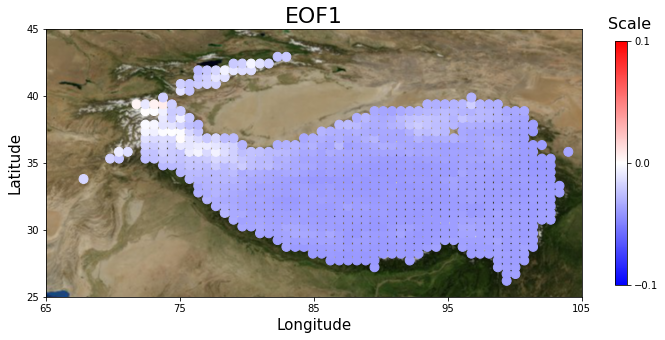

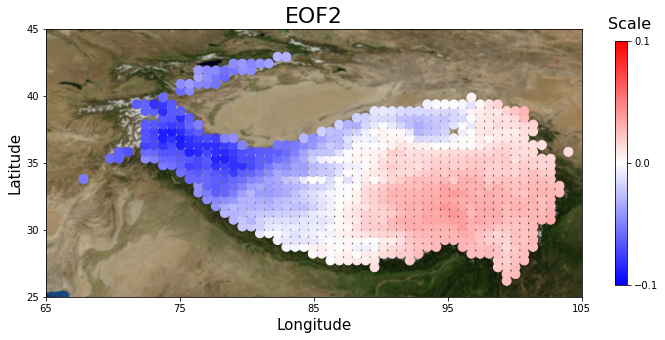

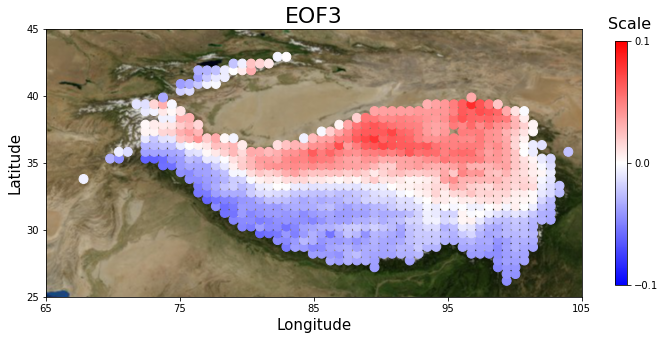

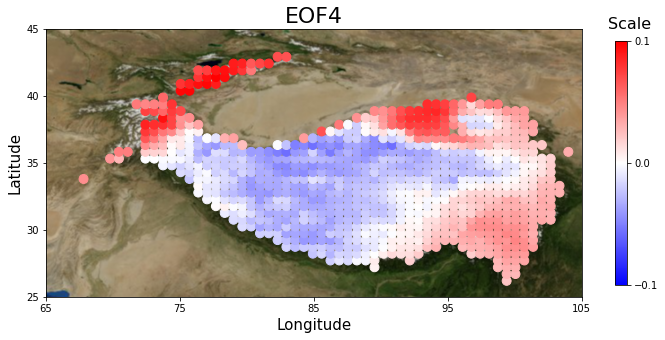

In [23]:
# create map 
# get longitude and latitude seperately 
lon=np.array(eofm4.iloc[:,0])
lat=np.array(eofm4.iloc[:,1])

#Plot first four EOF modes
for i in range(4):
    # set figure size
    plt.figure(figsize=(12, 10))
    # get map over Tibetan Plateau
    map_tibet = Basemap(projection='cyl',llcrnrlat=25,urcrnrlat=45,llcrnrlon=65,urcrnrlon=105,resolution='c')
    # convert lon and lat varibles into coordinates in basemap
    x,y = map_tibet(lon,lat)
    # add map background
    map_tibet.bluemarble()
    # get each EOF values
    EOF = np.array(eofm4.iloc[:,i+2])
    # scatter EOF values and set colorbar bounds
    eof_plt = map_tibet.scatter(x,y,80,marker="o",c=EOF,cmap="bwr",vmin =-.1, vmax =.1)
    # set labels and colorbar bounds
    bounds = np.array([-0.1,0,0.1])
    # plot colorbar and change its size
    plt.colorbar(eof_plt, ticks=bounds,shrink=0.45)
    # add colorbar label
    plt.text(107, 45, 'Scale', size=16)
    # add x-axis label
    plt.xlabel('Longitude',fontsize=15)
    # add y-axis label
    plt.ylabel('Latitude',fontsize=15)
    # add plot title
    plt.title('EOF'+ str(i+1),fontsize=22)
    # add x-axis ticks
    plt.xticks(np.arange(65, 115, step=10))
    # add y-axis ticks
    plt.yticks(np.arange(25, 50, step=5))
    # show plot
    plt.show()   

In [46]:
# load Eigenvalues modes data
eigs = pd.read_csv("data/Eigenvalues.csv")
eigs.head()

,0
0,154.079869
1,62.314902
2,47.327114
3,38.810627
4,31.058102


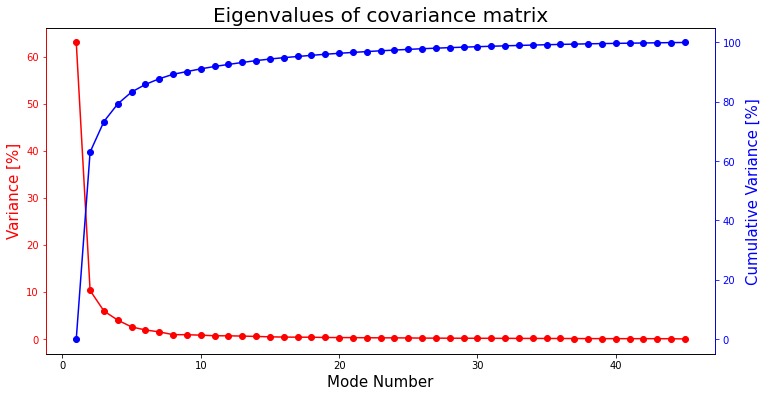

In [25]:
# Plot variances and cumulative variances from SVD eigenvalues
eig = eigs.mul(eigs).div(45)
# set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

n = np.array(range(1,46,1))
# calculate variances
eig_percentage = eig/eig.sum()*100
# add x-axis label
ax1.set_xlabel('Mode Number',fontsize=15)
# add left y-axis label
ax1.set_ylabel('Variance [%]', color="red",fontsize=15)
# plot variances
ax1.plot(n, eig_percentage, color="red",marker="o")
# set left y-axis tick lable color
ax1.tick_params(axis='y', labelcolor="red",color="red")

# calculate cumulative variances
cum_eig=list()
for i in range(len(eig)):
    cum_eig.append((eig.iloc[0:i,].sum()/eig.sum())*100)

# create right y-axis
ax2 = ax1.twinx()
# add right y-axis label
ax2.set_ylabel('Cumulative Variance [%]', color="blue",fontsize=15)
# set left and right y-axis color
ax2.spines['left'].set_color('red')
ax2.spines['right'].set_color('blue')
# plot cumulative variances
ax2.plot(n, cum_eig, color="blue",marker="o")
# set right y-axis tick lable color
ax2.tick_params(axis='y', labelcolor="blue",color="blue")

# add plot title
plt.title("Eigenvalues of covariance matrix",fontsize=20)
# show plot
plt.show()

In [47]:
# load PCs data
pcs = pd.read_csv("data/PCs.csv")
pcs.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.176983,-0.013698,0.083598,-0.112108,0.073023,0.176954,-0.106340,0.013343,0.232794,-0.030363,...,0.192123,-0.394766,-0.053982,-0.043970,-0.175360,0.070823,0.273379,-0.126522,-0.007058,0.105389
1,0.226739,-0.089385,0.314747,0.095417,-0.123278,-0.101239,-0.120889,-0.029018,-0.051685,-0.034354,...,0.159113,0.105479,-0.037233,-0.145919,0.179521,0.156583,0.186152,-0.149198,-0.158842,0.165380
2,-0.250255,0.297680,0.010922,0.059899,-0.106822,-0.081573,0.012700,0.058807,-0.171349,-0.111600,...,0.067113,-0.039411,0.216926,-0.042262,-0.303800,0.239426,-0.006224,-0.148768,0.114381,0.140956
3,0.260060,0.179060,-0.033680,-0.002818,0.139804,0.124039,0.014981,0.032046,0.032734,0.158464,...,-0.290662,-0.211857,0.039863,-0.272904,-0.199649,-0.181762,-0.307196,0.023556,-0.006229,-0.000521
4,-0.133918,0.120618,-0.077468,-0.280825,0.177542,-0.037143,0.038034,0.337642,-0.269171,0.126271,...,0.050577,-0.096983,-0.007964,0.129376,0.320704,0.218165,-0.118740,0.067375,0.211277,0.215244


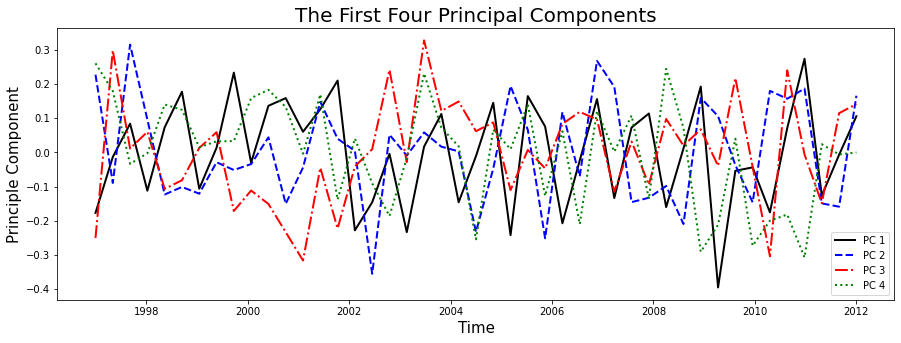

In [27]:
# set figure size
plt.figure(figsize=(15, 5))
t=np.linspace(1997,2012,45)
# plot PCs
plt.plot(t,pcs.iloc[0,],label="PC 1",linestyle="-",color="black", linewidth=2)
plt.plot(t,pcs.iloc[1,],label="PC 2",linestyle="--",color="blue", linewidth=2)
plt.plot(t,pcs.iloc[2,],label="PC 3",linestyle="-.",color="red", linewidth=2)
plt.plot(t,pcs.iloc[3,],label="PC 4",linestyle=":",color="green", linewidth=2)
# add y-axis label
plt.ylabel("Principle Component", fontsize=15)
# add x-axis label
plt.xlabel("Time", fontsize=15)
# add plot title
plt.title("The First Four Principal Components",fontsize=20)
# add legend
plt.legend()
# show plot
plt.show()

In [48]:
# load observed data
obdata =pd.read_csv("data/Obdata.csv")
obdata.head()

,StationName,GridID,lat,lon,1997-06-15,1997-07-15,1997-08-15,1998-06-15,1998-07-15,1998-08-15,...,2002-08-15,2003-06-15,2003-07-15,2003-08-15,2004-06-15,2004-07-15,2004-08-15,2005-06-15,2005-07-15,2005-08-15
0,Nyalam,21,28.183333,85.966667,-12.683579,-18.476984,-18.154162,-11.155542,-17.583969,-16.173093,...,NaN,-10.695070,-13.063956,-16.864345,NaN,NaN,NaN,-14.210764,-11.464638,-13.319687
1,Dingri,45,28.650000,87.116667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-15.018469,-18.291270,-20.868760,NaN,NaN,NaN,-3.119152,-18.203914,-21.647571
2,Wengguo,50,28.900000,90.350000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-18.273237,-17.966642,-18.516833,NaN,NaN,NaN
3,Dui,51,28.583333,90.533333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-20.089943,-19.068479,-22.301420,NaN,NaN,NaN
4,Larzi,74,29.083333,87.683333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.061375,-20.703838,-21.271261


In [29]:
# create lists for climotology and standard deviation
climo = list()
sdo = list()
# get climotology and standard deviation for 15 stations
for i in obdata.iloc[:,1].values:
    climo.append(rsdata_mean[i-1])
    sdo.append(rsdata_std[i-1])
# standardized observed data
obdata_std=obdata.iloc[:,4:].sub(climo,axis=0).div(sdo,axis=0)
obdata_std.head()

,1997-06-15,1997-07-15,1997-08-15,1998-06-15,1998-07-15,1998-08-15,1999-06-15,1999-07-15,1999-08-15,2000-06-15,...,2002-08-15,2003-06-15,2003-07-15,2003-08-15,2004-06-15,2004-07-15,2004-08-15,2005-06-15,2005-07-15,2005-08-15
0,1.561591,-0.126599,-0.032529,2.006858,0.133625,0.544752,1.035382,1.086542,0.280828,0.898180,...,NaN,2.141039,1.450750,0.343322,NaN,NaN,NaN,1.116571,1.916788,1.376230
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.443224,...,NaN,0.771840,-0.264202,-1.080135,NaN,NaN,NaN,4.538704,-0.236548,-1.326677
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.958565,-0.850544,-1.044389,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.476377,-1.155215,-2.171697,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681417,-1.631949,-1.803708


In [30]:
# select 3 EOFs
eof3 = EOFs.iloc[:,0:3]
# get coordinates and drop index values
coordinates = rsdata.iloc[:,1:3].reset_index(drop=True)
# combine coordinates and three EOFs
eofm3 = pd.concat([coordinates, eof3], axis=1)
eofm3.head()

,Lon,Lat,0,1,2
0,99.401314,26.191608,-0.037465,0.024862,-0.044253
1,99.401314,26.698650,-0.037610,0.023681,-0.041403
2,100.059210,26.698650,-0.036690,0.025292,-0.042710
3,89.532898,27.205692,-0.037742,0.012001,-0.038077
4,98.743423,27.205692,-0.035926,0.020418,-0.046676


In [40]:
# use multi-linear regression to reconstruct data
regr = linear_model.LinearRegression(fit_intercept=True)
# create empty dataframe to store reconstructed data
recon = pd.DataFrame(columns=rsdata.iloc[:,3:30].columns)
for i in range(obdata_std.shape[1]):
    ob_eof = pd.DataFrame()
    index = obdata_std[-obdata_std.iloc[:,i].isnull()].index.tolist()
    box_id = obdata.iloc[index,1]
    data_ob = obdata_std.iloc[index,i]
    data_eof = eofm3.iloc[box_id-1,2:5]
    ob_eof[["EOF1","EOF2","EOF3"]] = data_eof
    ob_eof["Y"] = data_ob.values
    X = ob_eof.iloc[:,0:3]
    y = ob_eof.iloc[:,3]
    regr.fit(X, y)
    element=0
    for j in range(len(regr.coef_)):
        element+=eofm3.iloc[:,j+2]*regr.coef_[j]
        recon.iloc[:,i]=element+regr.intercept_
# transforation back to real reconstructed data
recon = recon.mul(rsdata_std.to_numpy(),axis=0).add(rsdata_mean.to_numpy(),axis=0)
recon.head()

,1997 Jun,1997 Jul,1997 Aug,1998 Jun,1998 Jul,1998 Aug,1999 Jun,1999 Jul,1999 Aug,2000 Jun,...,2002 Aug,2003 Jun,2003 Jul,2003 Aug,2004 Jun,2004 Jul,2004 Aug,2005 Jun,2005 Jul,2005 Aug
0,-6.069124,-18.757816,-21.022425,-24.057983,-24.792690,-24.829965,-10.778552,-17.124827,-10.692915,-13.180761,...,-16.152913,-7.981572,-15.703329,-15.014750,-14.695841,-15.332771,-14.937600,-8.578806,-14.035741,-17.135012
1,-7.488934,-19.726300,-21.798807,-24.066322,-25.200395,-25.311277,-12.169542,-17.836005,-12.681270,-14.335191,...,-17.375844,-9.670544,-16.852925,-16.586896,-15.874966,-16.722275,-16.513641,-9.584628,-15.645967,-18.407240
2,-5.351607,-18.648083,-21.349786,-26.373752,-26.453328,-26.612690,-9.875618,-18.114900,-8.680673,-13.218908,...,-15.843344,-6.404738,-15.509247,-13.918333,-14.645903,-14.400678,-13.617111,-9.199618,-12.992378,-16.756828
3,-3.521279,-12.236833,-13.313367,-12.361770,-14.993717,-15.114127,-8.954787,-12.277719,-10.542302,-9.344176,...,-12.106332,-5.193766,-10.335214,-11.867727,-12.689174,-11.611665,-11.797214,-5.057274,-10.319369,-12.380528
4,-7.563147,-18.567066,-21.015072,-26.246828,-26.007577,-26.053258,-12.018335,-20.400147,-9.715983,-14.917164,...,-16.754324,-7.154555,-15.918830,-14.198679,-17.186878,-14.879886,-13.809785,-12.248997,-12.946731,-16.961616


In [41]:
# get box id and coordinates
id_coord = rsdata.iloc[:,0:3].values
# add column names
id_coord = pd.DataFrame(id_coord,columns=["BoxID","Lon","Lat"])
# change box id from float to int
id_coord["BoxID"] = id_coord["BoxID"].astype(int)
# add box id and coordinates to reconstructed data
recon = pd.concat([id_coord, recon], axis=1)
recon.head()

,BoxID,Lon,Lat,1997 Jun,1997 Jul,1997 Aug,1998 Jun,1998 Jul,1998 Aug,1999 Jun,...,2002 Aug,2003 Jun,2003 Jul,2003 Aug,2004 Jun,2004 Jul,2004 Aug,2005 Jun,2005 Jul,2005 Aug
0,1,99.401314,26.191608,-6.069124,-18.757816,-21.022425,-24.057983,-24.792690,-24.829965,-10.778552,...,-16.152913,-7.981572,-15.703329,-15.014750,-14.695841,-15.332771,-14.937600,-8.578806,-14.035741,-17.135012
1,2,99.401314,26.698650,-7.488934,-19.726300,-21.798807,-24.066322,-25.200395,-25.311277,-12.169542,...,-17.375844,-9.670544,-16.852925,-16.586896,-15.874966,-16.722275,-16.513641,-9.584628,-15.645967,-18.407240
2,3,100.059210,26.698650,-5.351607,-18.648083,-21.349786,-26.373752,-26.453328,-26.612690,-9.875618,...,-15.843344,-6.404738,-15.509247,-13.918333,-14.645903,-14.400678,-13.617111,-9.199618,-12.992378,-16.756828
3,4,89.532898,27.205692,-3.521279,-12.236833,-13.313367,-12.361770,-14.993717,-15.114127,-8.954787,...,-12.106332,-5.193766,-10.335214,-11.867727,-12.689174,-11.611665,-11.797214,-5.057274,-10.319369,-12.380528
4,5,98.743423,27.205692,-7.563147,-18.567066,-21.015072,-26.246828,-26.007577,-26.053258,-12.018335,...,-16.754324,-7.154555,-15.918830,-14.198679,-17.186878,-14.879886,-13.809785,-12.248997,-12.946731,-16.961616


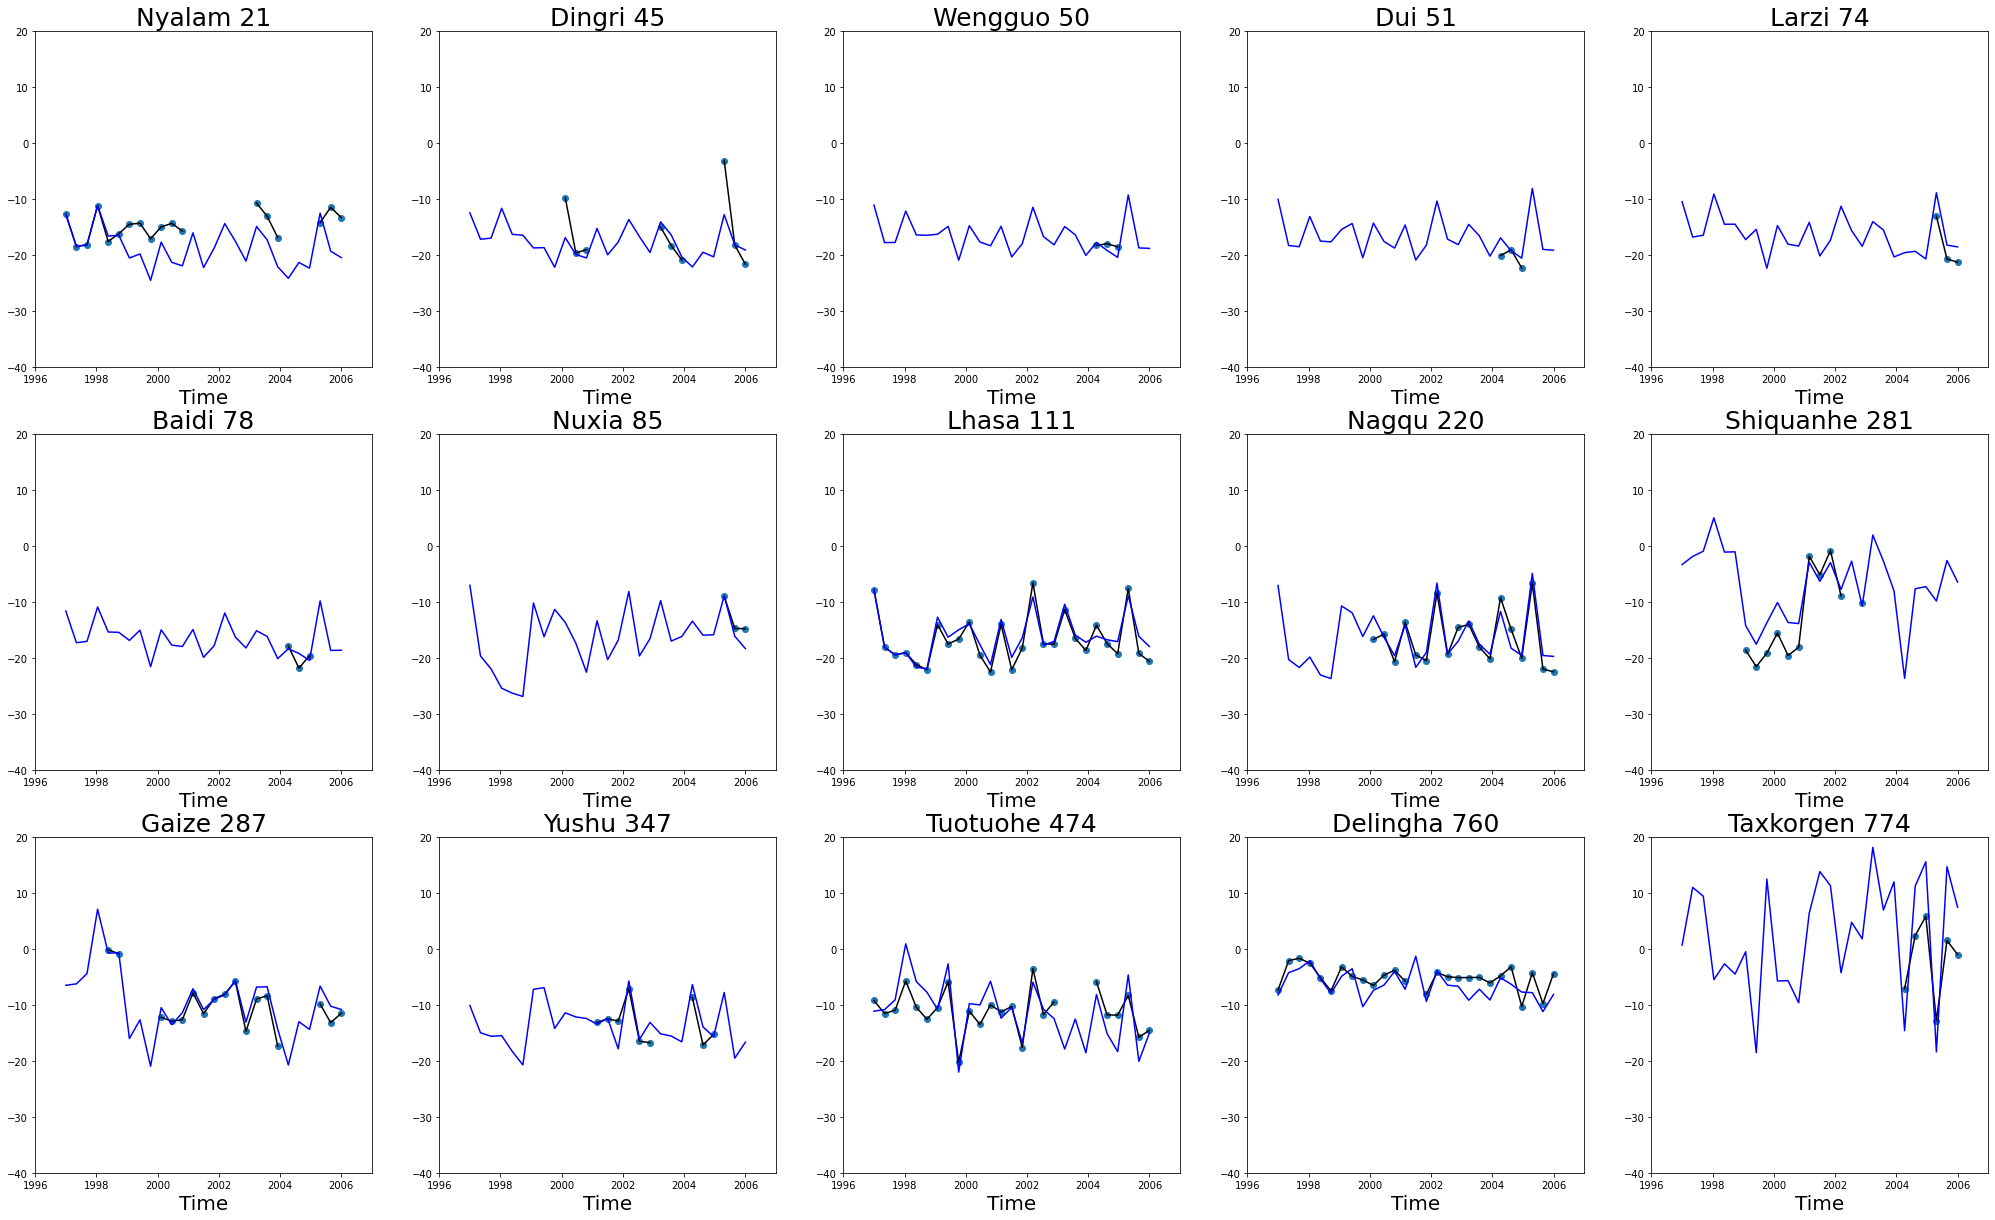

In [42]:
# set figure size
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(35, 21))
t=np.linspace(1997,2006,27)
# plot reconstructed data and observed data
for i in range(3):
    for j in range(5):
        # plot observed data as points
        axes[i,j].scatter(t,obdata.iloc[i*5+j,4:])
        # plot observed data as line
        axes[i,j].plot(t,obdata.iloc[i*5+j,4:],color="black")
        # set y-axis limits
        axes[i,j].set_ylim([-40,20])
        # set x-axis limits
        axes[i,j].set_xlim([1996,2007])
        # get box id
        box_id = obdata.iloc[i*5+j,1]
        # plot reconstructed data
        recon_index = recon[recon["BoxID"]==box_id].index
        axes[i,j].plot(t,recon.iloc[recon_index,3:].values[0],color="blue") 
        # add plot title
        axes[i,j].set_title("{} {}".format(obdata.iloc[i*5+j,0],obdata.iloc[i*5+j,1]),fontsize=25)
        # add plot x-axis label
        axes[i,j].set_xlabel("Time",fontsize=20)       
# show plot
plt.show()